# Global Setting

In [711]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [1200]:
result_file_path = '../aggrdet/results-ratio-nextend/quality-eval/quality-eval-error-level-0.0005.jl'

import json

with open(result_file_path, 'r') as file_reader:
    results = [json.loads(line) for line in file_reader]

In [1201]:
# group aggregations according to their error level
annotations = [result['aggregation_annotations'] for result in results]

error_bounds = {}
error_level_percent = {}
for ans in annotations:
#     if not ans:
#         continue
    for an in ans:
        if an['operator'] != 'Sum' and an['operator'] != 'Subtract':
            continue
        error_level = an['error_bound']
        ar_error_level_percent = an['error_level_percent']
        error_bounds[error_level] = 1 if error_level not in error_bounds else error_bounds[error_level] + 1
        error_level_percent[ar_error_level_percent] = 1 if ar_error_level_percent not in error_level_percent else error_level_percent[ar_error_level_percent] + 1
    
error_bounds = {k: v for k, v in sorted(error_bounds.items(), key=lambda item: item[0])}
error_level_percent = {k: v for k, v in sorted(error_level_percent.items(), key=lambda item: item[0])}

# number of all valid aggregations
# num_valid = sum([v for k, v in error_bounds.items()])
num_valid = sum(error_level_percent.values())
print('Number of sum or subtract aggregations: %d' % (num_valid))
# print(error_bounds)
# print()
# print(error_level_percent)

Number of sum or subtract aggregations: 2232


Number of sum or subtract aggregations whose error level (Percent) is between 0 and 1: 2207
[1531, 1900, 1998, 2025, 2055, 2119, 2145, 2171, 2181, 2198]


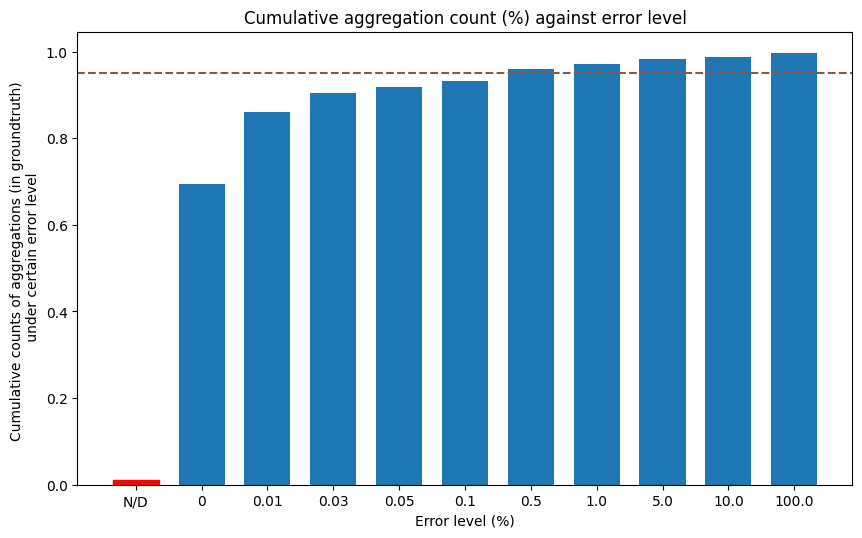

In [1202]:
# histigram of error levels
error_bounds = {k: v for k, v in error_level_percent.items() if 0<= k <= 1}
total_aggregation_count = sum(error_bounds.values())
print('Number of sum or subtract aggregations whose error level (Percent) is between 0 and 1: %d' % (total_aggregation_count))

error_level_upper_boundaries = [0, 0.0001, 0.0003, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.999]
# cumu_error_leveled_counts = []
cumu_error_leveled_percent = []
current_inspected_index = 0
cumu_count = 0
for k, v in error_bounds.items():
    if k > error_level_upper_boundaries[current_inspected_index]:
#         cumu_error_leveled_counts.append(cumu_count)
#         cumu_error_leveled_percent.append(cumu_count)
        cumu_error_leveled_percent.append(cumu_count / total_aggregation_count)
        current_inspected_index += 1
        if current_inspected_index == len(error_level_upper_boundaries):
            break
    cumu_count += v
cumu_error_leveled_counts

error_level_upper_boundaries[len(error_level_upper_boundaries)-1] += 0.001
error_level_upper_boundaries = [e * 100 for e in error_level_upper_boundaries]
error_level_upper_boundaries.insert(0, 'N/D')
# cumu_error_leveled_percent.insert(0, error_level_percent[-1])
cumu_error_leveled_percent.insert(0, error_level_percent[-1] / total_aggregation_count)

print(cumu_error_leveled_counts)

x = np.arange(len(error_level_upper_boundaries))
width = 0.7

fig, ax = plt.subplots()

# p1 = ax.bar(x, cumu_error_leveled_counts, width)
p1 = ax.bar(x, cumu_error_leveled_percent, width)
ax.set_xticks(x)
ax.set_xticklabels(error_level_upper_boundaries)
ax.set_xlabel('Error level (%)')
ax.set_ylabel('Cumulative counts of aggregations (in groundtruth) \n under certain error level')
ax.get_children()[0].set_color('r')

# Set a title of the current axes.
plt.title('Cumulative aggregation count (%) against error level')

# Cumulative obv level
plt.axhline(y=0.95, color='tab:brown', linestyle='--')

plt.show()

In [1235]:
def return_per_file_correctness(results):
    # per file correctness
    correctness = []
    for result in results:
        correct = result['correct']
        incorrect = result['incorrect']
        false_positive = result['false_positive']
        if len(correct) == 0 and len(incorrect) == 0:
#             print('File: %s has no aggregations.' % result['file_name'])
            continue
        if len(correct) == 0 and len(false_positive) == 0:
#             print('File: %s has no predictions.' % result['file_name'])
#             continue
            pass
        precision = len(correct) / (len(correct) + len(false_positive)) if (len(correct) + len(false_positive)) > 0 else 0
        correctness.append([result['file_name'], len(correct), len(incorrect), len(false_positive), (len(incorrect) + len(correct)), len(correct) / (len(incorrect) + len(correct)), precision])
    correctness_df = pandas.DataFrame(data=correctness, columns=['File name', '# correct', '# incorrect', '# false positive', '# GT', 'Correctness (%) (Recall)', 'Precision'])
    return correctness_df

In [1236]:
return_per_file_correctness(results)

,File name,# correct,# incorrect,# false positive,# GT,Correctness (%) (Recall),Precision
0,C10001,44,19,0,63,0.698413,1.000000
1,C10002,1,6,0,7,0.142857,1.000000
2,C10003,31,4,0,35,0.885714,1.000000
3,C10004,0,4,2,4,0.000000,0.000000
4,C10005,2,0,0,2,1.000000,1.000000
5,C10006,3,0,0,3,1.000000,1.000000
6,C10007,0,5,0,5,0.000000,0.000000
7,C10008,20,15,5,35,0.571429,0.800000
8,C10009,5,7,0,12,0.416667,1.000000
9,C10010,8,7,0,15,0.533333,1.000000


In [1205]:
# import numpy as np

# intervals = np.linspace(0,1,11)

# intervals

import numpy as np

intervals = np.linspace(0,1,6)

intervals

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [858]:
# number_files_correct_gt_percent = []

# for percent in intervals:
#     satisfied_files = [f for f in correctness if f[3] >= percent]
#     number_files_correct_gt_percent.append([percent, len(satisfied_files)])

# error_level_thresholds = [0, 0.1, 1, 5, 10, 20, 100]
# for result in results:
#     annotations = result['aggregation_annotations']
#     if not annotations:
#         result['annotations_coverage'] = {}
#         continue
#     coverage = {}
#     num_annotations = len([annotation for annotation in annotations if annotation['operator'] == 'Sum' or annotation['operator'] == 'Subtract'])
#     for threshold in error_level_thresholds:
#         for annotation in annotations:
#             if annotation['operator'] != 'Sum' and annotation['operator'] != 'Subtract':
#                 continue
#             if annotation['error_bound'] <= threshold:
#                 coverage[threshold] = 1 if threshold not in coverage else coverage[threshold] + 1
#     for c in coverage:
#         coverage[c] = coverage[c] / num_annotations
#     result['annotations_coverage'] = coverage

# coverage_all_thresholds = {}
# for inspected_level in error_level_thresholds:
#     num_covered = 0
#     for result in results:
#         coverage = result['annotations_coverage']
#         if inspected_level in coverage:
#             if coverage[inspected_level] == 1.0:
#                 num_covered += 1
#     coverage_all_thresholds[inspected_level] = num_covered
    
# # {0: 47, 0.1: 59, 1: 88, 5: 105, 10: 116, 20: 126, 100: 133}
# coverage_all_thresholds

{0: 47, 0.1: 59, 1: 88, 5: 105, 10: 116, 20: 126, 100: 133}

In [1243]:
from glob import glob

data_path = '../aggrdet/results-ratio-extend/quality-eval/'
# data_path = '../aggrdet/results-ratio-nextend/quality-eval/'

error_levels = [0.0, 0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.01]

import os

legended_y_error_bounded = []
legended_y = []

x = intervals
y = {}
y_error_bounded = {}

for file in glob(os.path.join(data_path, 'quality-eval-error-level-*')):
    file_name = file.replace(data_path, '').replace('.jl', '').replace('quality-eval-', '')
    used_error_level = float(file_name.replace('error-level-', ''))
    if used_error_level not in error_levels:
        continue
    with open(file, 'r') as file_reader:
        results = [json.loads(line) for line in file_reader]
        num_ars_error_bounded = 0
        num_ars = 0
        for result in results:
            error_level = result['used_error_level']
            if error_level != used_error_level:
                print('Error level wrong.')
            gts = result['aggregation_annotations']
            satisfied_error_bounded = []
            satisfied = []
            for gt in gts:
                if gt['operator'] != 'Sum' and gt['operator'] != 'Subtract':
                    continue
                satisfied.append(gt)
                if gt['error_level_percent'] <= error_level:
                    satisfied_error_bounded.append(gt)
            if len(satisfied_error_bounded) == 0 or len(satisfied) == 0:
                continue
            num_ars_error_bounded += len(satisfied_error_bounded)
            correct_error_bounded = len(result['correct_error_bounded'])
            incorrect_error_bounded = len(result['incorrect_error_bounded'])
            if correct_error_bounded + incorrect_error_bounded != len(satisfied_error_bounded):
                print('Error bounded numbers do not add up.')
                print(result['file_name'])
                break            
            y_error_bounded[result['file_name']] = [correct_error_bounded, incorrect_error_bounded, correct_error_bounded / len(satisfied_error_bounded)]
            num_ars += len(satisfied)
            correct = len(result['correct'])
            incorrect = len(result['incorrect'])
            if correct + incorrect != len(satisfied):
                print('Numbers do not add up.')
                print(result['file_name'])
                break    
            y[result['file_name']] = [correct, incorrect, correct / len(satisfied)]
        z = {}
        z_error_bounded = {}
        for correctness in intervals:
#             z_error_bounded[correctness] = len([k for k, v in y_error_bounded.items() if v[2] >= correctness])
            z_error_bounded[correctness] = len([k for k, v in y_error_bounded.items() if v[2] >= correctness]) / len(y_error_bounded)
    
            z[correctness] = len([k for k, v in y.items() if v[2] >= correctness]) / len(y)
        legended_y_error_bounded.append([file_name, z_error_bounded, num_ars_error_bounded])
        legended_y.append([file_name, z, num_ars])
# os.chdir(cwd)
print([[e[0], e[2]] for e in legended_y_error_bounded])
print([[e[0], e[2]] for e in legended_y])

[['error-level-0.0005', 2049], ['error-level-0.0001', 1924], ['error-level-0.005', 2143], ['error-level-0.001', 2079], ['error-level-0.0003', 2022], ['error-level-0.003', 2123], ['error-level-0.0', 1555]]
[['error-level-0.0005', 2230], ['error-level-0.0001', 2220], ['error-level-0.005', 2232], ['error-level-0.001', 2232], ['error-level-0.0003', 2230], ['error-level-0.003', 2232], ['error-level-0.0', 2158]]


In [1244]:
print(z)
print(z_error_bounded)

{0.0: 1.0, 0.2: 0.916083916083916, 0.4: 0.8601398601398601, 0.6000000000000001: 0.7762237762237763, 0.8: 0.6573426573426573, 1.0: 0.6153846153846154}
{0.0: 1.0, 0.2: 0.916083916083916, 0.4: 0.8531468531468531, 0.6000000000000001: 0.7832167832167832, 0.8: 0.7272727272727273, 1.0: 0.6713286713286714}


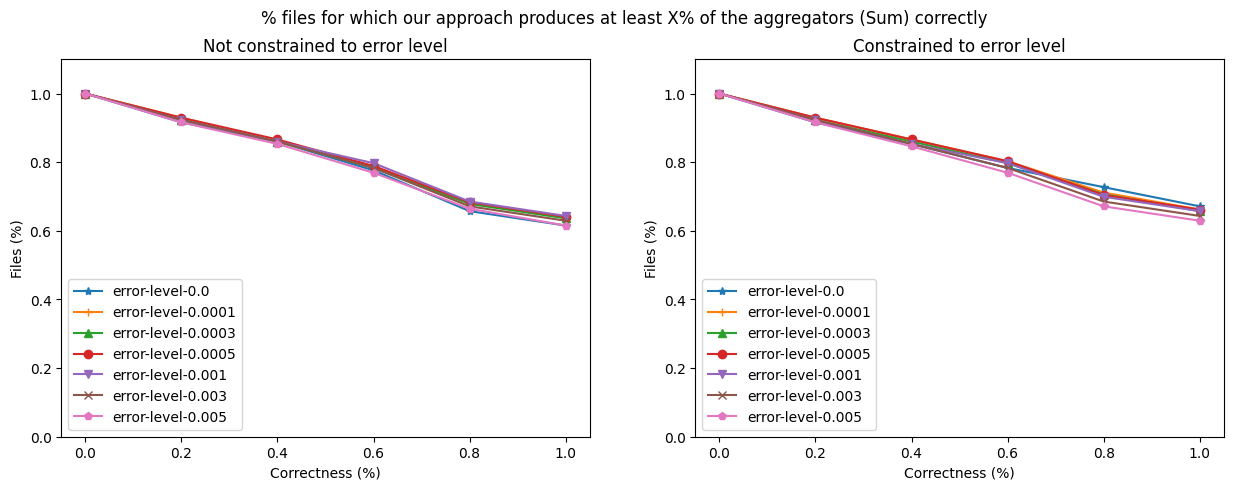

In [1248]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15, 5])

ax1.plot(intervals, [v for k, v in legended_y[6][1].items()], marker='*', label = legended_y[6][0])
ax1.plot(intervals, [v for k, v in legended_y[1][1].items()], marker='+', label = legended_y[1][0])
ax1.plot(intervals, [v for k, v in legended_y[4][1].items()], marker='^', label = legended_y[4][0])
ax1.plot(intervals, [v for k, v in legended_y[0][1].items()], marker='o', label = legended_y[0][0])
ax1.plot(intervals, [v for k, v in legended_y[3][1].items()], marker='v', label = legended_y[3][0])
ax1.plot(intervals, [v for k, v in legended_y[5][1].items()], marker='x', label = legended_y[5][0])
ax1.plot(intervals, [v for k, v in legended_y[2][1].items()], marker='p', label = legended_y[2][0])
ax1.set_xlabel('Correctness (%)')
ax1.set_ylabel('Files (%)')
ax1.set_ylim([0, 1.1])
ax1.legend(loc='lower left')
ax1.title.set_text('Not constrained to error level')

ax2.plot(intervals, [v for k, v in legended_y_error_bounded[6][1].items()], marker='*', label = legended_y_error_bounded[6][0])
ax2.plot(intervals, [v for k, v in legended_y_error_bounded[1][1].items()], marker='+', label = legended_y_error_bounded[1][0])
ax2.plot(intervals, [v for k, v in legended_y_error_bounded[4][1].items()], marker='^', label = legended_y_error_bounded[4][0])
ax2.plot(intervals, [v for k, v in legended_y_error_bounded[0][1].items()], marker='o', label = legended_y_error_bounded[0][0])
ax2.plot(intervals, [v for k, v in legended_y_error_bounded[3][1].items()], marker='v', label = legended_y_error_bounded[3][0])
ax2.plot(intervals, [v for k, v in legended_y_error_bounded[5][1].items()], marker='x', label = legended_y_error_bounded[5][0])
ax2.plot(intervals, [v for k, v in legended_y_error_bounded[2][1].items()], marker='p', label = legended_y_error_bounded[2][0])
ax2.set_xlabel('Correctness (%)')
ax2.set_ylabel('Files (%)')
ax2.set_ylim([0, 1.1])
ax2.legend(loc='lower left')
ax2.title.set_text('Constrained to error level')

# Set a title of the current axes.
fig.suptitle('% files for which our approach produces at least X% of the aggregators (Sum) correctly')

plt.show()

In [1255]:
intervals = np.linspace(0, 1, 6)
print('Bins are: %s' % (str(intervals)))

from glob import glob

data_path = '../aggrdet/results-ratio-nextend/quality-eval/'
# data_path = '../aggrdet/results-ratio-extend/quality-eval/'

import os

legended_y_error_bounded = []

x = intervals
file_percent_dist_correctness = []
file_percent_dist_precision = []
file_percent_dist_recall = file_percent_dist_correctness

file_percent_dist_correctness_error_bounded = []
file_percent_dist_precision_error_bounded = []
file_percent_dist_recall_error_bounded = file_percent_dist_correctness_error_bounded

precision_recall_f1 = []
precision_recall_f1_error_bounded = []

for file in glob(os.path.join(data_path, 'quality-eval-error-level-*')):
    file_name = file.replace(data_path, '').replace('.jl', '').replace('quality-eval-', '')
    cumu_true_positive_error_bounded = 0
    cumu_false_negative_error_bounded = 0
    cumu_false_positive_error_bounded = 0
    cumu_true_positive = 0
    cumu_false_negative = 0
    cumu_false_positive = 0
    with open(file, 'r') as file_reader:
        results = [json.loads(line) for line in file_reader]
        files_error_bounded = {}
        y = {}
        y_error_bounded = {}
        for result in results:
#             if result['file_name'] != 'C10177':
#                 continue
            error_level = result['used_error_level']
            gts = result['aggregation_annotations']
            satisfied_error_bounded = [] # how many aggregations are there in the ground truth that are sum or subtract and have low enough error level
            satisfied = []
            for gt in gts:
                if gt['operator'] != 'Sum' and gt['operator'] != 'Subtract':
                    continue
                satisfied.append(gt)
                if gt['error_level_percent'] <= error_level:
                    satisfied_error_bounded.append(gt)
            if len(satisfied_error_bounded) == 0 or len(satisfied) == 0:
                continue
            files_error_bounded[result['file_name']] = len(satisfied_error_bounded)
            correct_error_bounded = len(result['correct_error_bounded'])
            incorrect_error_bounded = len(result['incorrect_error_bounded'])
            false_positive_error_bounded = len(result['false_positive_error_bounded'])
            if correct_error_bounded + incorrect_error_bounded != len(satisfied_error_bounded):
                print('Error bounded numbers do not add up.')
                print(result['file_name'])
                break
            if correct_error_bounded + false_positive_error_bounded == 0:
                precision_error_bounded = -1
            else:
                precision_error_bounded = correct_error_bounded / (correct_error_bounded + false_positive_error_bounded)
            cumu_true_positive_error_bounded += correct_error_bounded
            cumu_false_negative_error_bounded += incorrect_error_bounded
            cumu_false_positive_error_bounded += false_positive_error_bounded
            y_error_bounded[result['file_name']] = [correct_error_bounded, incorrect_error_bounded, correct_error_bounded / len(satisfied_error_bounded), precision_error_bounded]
            
            correct = len(result['correct'])
            incorrect = len(result['incorrect'])
            false_positive = len(result['false_positive'])
            if correct + incorrect != len(satisfied):
                print('Numbers do not add up.')
                print(result['file_name'])
                break                
            if correct + false_positive == 0:
                precision = -1
            else:
                precision = correct / (correct + false_positive)
            cumu_true_positive += correct
            cumu_false_negative += incorrect
            cumu_false_positive += false_positive
            y[result['file_name']] = [correct, incorrect, correct / len(satisfied), precision]
            if file_name == 'error-level-0.005':
#                 print(result['file_name'] + '\t' + str(cumu_true_positive_error_bounded) + '\t' + str(cumu_false_positive_error_bounded) + '\t' + str(cumu_true_positive) + '\t' + str(cumu_false_positive))
#                 print(result['file_name'] + '\t' + str(correct_error_bounded) + '\t' + str(false_positive_error_bounded) + '\t' + str(correct) + '\t' + str(false_positive))
                pass
            
        overall_precision_error_bounded = cumu_true_positive_error_bounded / (cumu_true_positive_error_bounded + cumu_false_positive_error_bounded)
        overall_recall_error_bounded = cumu_true_positive_error_bounded / (cumu_true_positive_error_bounded + cumu_false_negative_error_bounded)
        overall_f1_error_bounded = 2*overall_precision_error_bounded*overall_recall_error_bounded / (overall_precision_error_bounded + overall_recall_error_bounded)
        precision_recall_f1_error_bounded.append([file_name, round(overall_precision_error_bounded, 3), round(overall_recall_error_bounded, 3), 
                                                  round(overall_f1_error_bounded, 3), (cumu_true_positive_error_bounded + cumu_false_positive_error_bounded)])
        
        overall_precision = cumu_true_positive / (cumu_true_positive + cumu_false_positive)
        overall_recall = cumu_true_positive / (cumu_true_positive + cumu_false_negative)
        overall_f1 = 2*overall_precision*overall_recall / (overall_precision + overall_recall)
        precision_recall_f1.append([file_name, round(overall_precision, 3), round(overall_recall, 3), round(overall_f1, 3), (cumu_true_positive + cumu_false_positive)])
        
        digitized_error_bounded = np.digitize([v[2] for k, v in y_error_bounded.items()], intervals, right=True)
#         file_percent_dist_correctness_error_bounded.append([file_name, [len(digitized_error_bounded[digitized_error_bounded == i]) / len(digitized_error_bounded) for i in range(0, len(intervals))]])
        file_percent_dist_correctness_error_bounded.append([file_name, [len(digitized_error_bounded[digitized_error_bounded == i]) for i in range(0, len(intervals))]])
        digitized_precision_error_bounded = np.digitize([v[3] for k, v in y_error_bounded.items()], intervals, right=True)
#         file_percent_dist_precision_error_bounded.append([file_name, [len(digitized_precision_error_bounded[digitized_precision_error_bounded == i]) / len(digitized_error_bounded)
#                                                                       for i in range(0, len(intervals))]])
        file_percent_dist_precision_error_bounded.append([file_name, [len(digitized_precision_error_bounded[digitized_precision_error_bounded == i]) 
                                                                      for i in range(0, len(intervals))]])
        
        digitized = np.digitize([v[2] for k, v in y.items()], intervals, right=True)
#         file_percent_dist_correctness.append([file_name, [len(digitized[digitized == i]) / len(digitized) for i in range(0, len(intervals))]])
        file_percent_dist_correctness.append([file_name, [len(digitized[digitized == i]) for i in range(0, len(intervals))]])
        digitized_precision = np.digitize([v[3] for k, v in y.items()], intervals, right=True)
        file_percent_dist_precision.append([file_name, [len(digitized_precision[digitized_precision == i]) for i in range(0, len(intervals))]])
#         file_percent_dist_precision.append([file_name, [len(digitized_precision[digitized_precision == i]) / len(digitized_precision) for i in range(0, len(intervals))]])
print(*file_percent_dist_correctness, sep='\n')
print()
print(*file_percent_dist_precision, sep='\n')
print()
print(*file_percent_dist_correctness_error_bounded, sep='\n')
print()
print(*file_percent_dist_precision_error_bounded, sep='\n')

Bins are: [0.  0.2 0.4 0.6 0.8 1. ]
['error-level-0.0005', [4, 4, 14, 18, 22, 80]]
['error-level-0.0001', [4, 5, 14, 22, 24, 72]]
['error-level-0.005', [5, 2, 12, 14, 17, 93]]
['error-level-0.001', [5, 2, 16, 18, 18, 84]]
['error-level-0.0003', [4, 4, 14, 18, 24, 78]]
['error-level-0.003', [5, 2, 12, 18, 19, 87]]
['error-level-0.0', [6, 10, 24, 35, 18, 40]]

['error-level-0.0005', [4, 4, 5, 8, 16, 105]]
['error-level-0.0001', [4, 3, 6, 7, 13, 108]]
['error-level-0.005', [5, 4, 5, 8, 24, 97]]
['error-level-0.001', [5, 4, 5, 8, 17, 104]]
['error-level-0.0003', [4, 4, 5, 8, 11, 110]]
['error-level-0.003', [5, 4, 4, 10, 22, 98]]
['error-level-0.0', [6, 3, 4, 9, 13, 98]]

['error-level-0.0005', [4, 1, 12, 10, 11, 104]]
['error-level-0.0001', [4, 1, 12, 11, 10, 103]]
['error-level-0.005', [5, 1, 11, 11, 11, 104]]
['error-level-0.001', [5, 1, 11, 11, 11, 104]]
['error-level-0.0003', [4, 1, 12, 10, 11, 104]]
['error-level-0.003', [5, 1, 11, 11, 12, 103]]
['error-level-0.0', [6, 2, 13, 9, 13, 9

# Precision recall curve

In [1165]:
data_paths = ['../aggrdet/results-ratio-nextend/quality-eval/', '../aggrdet/results-ratio-extend/quality-eval/']
# data_paths = ['../aggrdet/results-ratio-nextend/quality-eval/']

precision_recall_f1 = []
comparison = []
comparison_error_level = [0.0, 0.5]


for data_path in data_paths:
    prf1 = []
    for file in glob(os.path.join(data_path, 'quality-eval-error-level-*')):
        file_name = file.replace(data_path, '').replace('.jl', '').replace('quality-eval-', '')
        cumu_true_positive = 0
        cumu_false_negative = 0
        cumu_false_positive = 0
        with open(file, 'r') as file_reader:
            results = [json.loads(line) for line in file_reader]
            y = {}
            for result in results:
                gts = result['aggregation_annotations']
                satisfied = []
                for gt in gts:
                    if gt['operator'] != 'Sum' and gt['operator'] != 'Subtract':
                        continue
                    satisfied.append(gt)
                if len(satisfied) == 0:
                    continue
            
                correct = len(result['correct'])
                incorrect = len(result['incorrect'])
                false_positive = len(result['false_positive'])
                if correct + incorrect != len(satisfied):
                    print('Numbers do not add up.')
                    print(result['file_name'])
                    break                
                if correct + false_positive == 0:
                    precision = -1
                else:
                    precision = correct / (correct + false_positive)
                cumu_true_positive += correct
                cumu_false_negative += incorrect
                cumu_false_positive += false_positive
                y[result['file_name']] = [correct, incorrect, correct / len(satisfied), precision]
                if file_name == 'error-level-0.005':
#                 print(result['file_name'] + '\t' + str(cumu_true_positive_error_bounded) + '\t' + str(cumu_false_positive_error_bounded) + '\t' + str(cumu_true_positive) + '\t' + str(cumu_false_positive))
#                 print(result['file_name'] + '\t' + str(correct_error_bounded) + '\t' + str(false_positive_error_bounded) + '\t' + str(correct) + '\t' + str(false_positive))
                    pass

            used_error_level = result['used_error_level']
        
            overall_precision = cumu_true_positive / (cumu_true_positive + cumu_false_positive)
            overall_recall = cumu_true_positive / (cumu_true_positive + cumu_false_negative)
            overall_f1 = 2*overall_precision*overall_recall / (overall_precision + overall_recall)
            result = [file_name, used_error_level, round(overall_precision, 3), round(overall_recall, 3), round(overall_f1, 3), (cumu_true_positive + cumu_false_positive)]
            prf1.append(result)
            if used_error_level in comparison_error_level:
                print(used_error_level)
                comparison.append(return_per_file_correctness(results))
    precision_recall_f1.append(prf1)

0.5
0.0
0.5
0.0


In [1237]:
data_paths = ['../aggrdet/results-ratio-nextend/quality-eval/', '../aggrdet/results-ratio-extend/quality-eval/']
# data_paths = ['../aggrdet/results-ratio-nextend/quality-eval/']

precision_recall_f1 = []
comparison = []
comparison_error_level = [0.0]


for data_path in data_paths:
    prf1 = []
    for file in glob(os.path.join(data_path, 'quality-eval-error-level-*')):
        file_name = file.replace(data_path, '').replace('.jl', '').replace('quality-eval-', '')
        used_error_level = float(file_name.replace('error-level-', ''))
        if used_error_level not in comparison_error_level:
            continue
        cumu_true_positive = 0
        cumu_false_negative = 0
        cumu_false_positive = 0
        with open(file, 'r') as file_reader:
            results = [json.loads(line) for line in file_reader]
            y = {}
            for result in results:
                gts = result['aggregation_annotations']
                satisfied = []
                for gt in gts:
                    if gt['operator'] != 'Sum' and gt['operator'] != 'Subtract':
                        continue
                    satisfied.append(gt)
                if len(satisfied) == 0:
                    continue
            
                correct = len(result['correct'])
                incorrect = len(result['incorrect'])
                false_positive = len(result['false_positive'])
                if correct + incorrect != len(satisfied):
                    print('Numbers do not add up.')
                    print(result['file_name'])
                    break                
                if correct + false_positive == 0:
                    precision = -1
                else:
                    precision = correct / (correct + false_positive)
                cumu_true_positive += correct
                cumu_false_negative += incorrect
                cumu_false_positive += false_positive
                y[result['file_name']] = [correct, incorrect, correct / len(satisfied), precision]
                if file_name == 'error-level-0.005':
#                 print(result['file_name'] + '\t' + str(cumu_true_positive_error_bounded) + '\t' + str(cumu_false_positive_error_bounded) + '\t' + str(cumu_true_positive) + '\t' + str(cumu_false_positive))
#                 print(result['file_name'] + '\t' + str(correct_error_bounded) + '\t' + str(false_positive_error_bounded) + '\t' + str(correct) + '\t' + str(false_positive))
                    pass

            used_error_level = result['used_error_level']
        
            overall_precision = cumu_true_positive / (cumu_true_positive + cumu_false_positive)
            overall_recall = cumu_true_positive / (cumu_true_positive + cumu_false_negative)
            overall_f1 = 2*overall_precision*overall_recall / (overall_precision + overall_recall)
            result = [file_name, used_error_level, round(overall_precision, 3), round(overall_recall, 3), round(overall_f1, 3), (cumu_true_positive + cumu_false_positive)]
            prf1.append(result)
            if used_error_level in comparison_error_level:
                print(used_error_level)
                print(data_path)
                comparison.append(return_per_file_correctness(results))
    precision_recall_f1.append(prf1)

0.0
../aggrdet/results-ratio-nextend/quality-eval/
0.0
../aggrdet/results-ratio-extend/quality-eval/


In [1223]:
import pandas
from copy import copy

comp = comparison[0].merge(comparison[1], left_on=['File name'], right_on=['File name'])
# comp = comparison[0]

pandas.set_option('display.max_columns', None)  # or 1000
pandas.set_option('display.max_rows', None)  # or 1000
pandas.set_option('display.max_colwidth', None)  # or 199

comp

,File name,# correct_x,# incorrect_x,# false positive_x,# GT_x,Correctness (%) (Recall)_x,Precision_x,# correct_y,# incorrect_y,# false positive_y,# GT_y,Correctness (%) (Recall)_y,Precision_y
0,C10001,44,19,0,63,0.698413,1.000000,49,14,0,63,0.777778,1.000000
1,C10002,1,6,0,7,0.142857,1.000000,7,0,0,7,1.000000,1.000000
2,C10003,31,4,0,35,0.885714,1.000000,35,0,0,35,1.000000,1.000000
3,C10004,0,4,2,4,0.000000,0.000000,0,4,8,4,0.000000,0.000000
4,C10005,2,0,0,2,1.000000,1.000000,2,0,0,2,1.000000,1.000000
5,C10006,3,0,0,3,1.000000,1.000000,3,0,1,3,1.000000,0.750000
6,C10008,20,15,5,35,0.571429,0.800000,35,0,42,35,1.000000,0.454545
7,C10009,5,7,0,12,0.416667,1.000000,12,0,0,12,1.000000,1.000000
8,C10010,8,7,0,15,0.533333,1.000000,10,5,0,15,0.666667,1.000000
9,C10011,30,19,21,49,0.612245,0.588235,30,19,21,49,0.612245,0.588235


In [1239]:
total_correct = sum(comparison[1]['# correct'])
total_gt = sum(comparison[1]['# GT'])

total_correct / total_gt

0.6944444444444444

In [1166]:
import pandas
from copy import copy

comp = comparison[1].merge(comparison[0], left_on=['File name'], right_on=['File name'])

pandas.set_option('display.max_columns', 50)  # or 1000
pandas.set_option('display.max_rows', 50)  # or 1000
pandas.set_option('display.max_colwidth', None)  # or 199

comparison[0]

,File name,# correct,# incorrect,# false positive,Correctness (%) (Recall),Precision
0,C10001,48,15,7,0.761905,0.872727
1,C10002,0,7,86,0.000000,0.000000
2,C10003,30,5,14,0.857143,0.681818
3,C10004,0,4,42,0.000000,0.000000
4,C10005,2,0,0,1.000000,1.000000
...,...,...,...,...,...,...
138,C10195,15,15,44,0.500000,0.254237
139,C10196,2,0,0,1.000000,1.000000
140,C10197,3,3,39,0.500000,0.071429
141,C10198,11,10,32,0.523810,0.255814


In [1167]:
for i in range(len(precision_recall_f1)):
    precision_recall_f1[i] = [e for e in sorted(precision_recall_f1[i], key=lambda x: float(x[0].split('error-level-')[1]))]
    
# precision_recall_f1 = [e for e in sorted(precision_recall_f1, key=lambda x: float(x[0].split('error-level-')[1]))]

prf_nextend = pandas.DataFrame(precision_recall_f1[0], columns=['error-level', 'used_error_level', 'precision', 'recall', 'f1', '# pred'])

prf_extend = pandas.DataFrame(precision_recall_f1[1], columns=['error-level', 'used_error_level', 'precision', 'recall', 'f1', '# pred'])

In [1168]:
prf_nextend

,error-level,used_error_level,precision,recall,f1,# pred
0,error-level-0.0,0.000,0.799,0.502,0.616,1402
1,error-level-0.005,0.005,0.775,0.719,0.746,2069
2,error-level-0.01,0.010,0.756,0.728,0.742,2150
3,error-level-0.015,0.015,0.742,0.728,0.735,2190
4,error-level-0.02,0.020,0.724,0.727,0.725,2241
...,...,...,...,...,...,...
195,error-level-0.975,0.975,0.207,0.519,0.296,5611
196,error-level-0.98,0.980,0.207,0.522,0.297,5625
197,error-level-0.985,0.985,0.212,0.537,0.304,5657
198,error-level-0.99,0.990,0.209,0.534,0.301,5698


In [1169]:
prf_extend

,error-level,used_error_level,precision,recall,f1,# pred
0,error-level-0.0,0.000,0.593,0.694,0.640,2612
1,error-level-0.005,0.005,0.459,0.725,0.562,3526
2,error-level-0.01,0.010,0.416,0.718,0.527,3853
3,error-level-0.015,0.015,0.400,0.714,0.512,3985
4,error-level-0.02,0.020,0.382,0.714,0.498,4171
...,...,...,...,...,...,...
195,error-level-0.975,0.975,0.141,0.532,0.223,8398
196,error-level-0.98,0.980,0.142,0.534,0.224,8398
197,error-level-0.985,0.985,0.142,0.534,0.224,8408
198,error-level-0.99,0.990,0.141,0.534,0.224,8426


In [1190]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    text= "Error level={:.2f}%, F1={:.3f}".format(xmax*100, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.3,0.85), **kw)

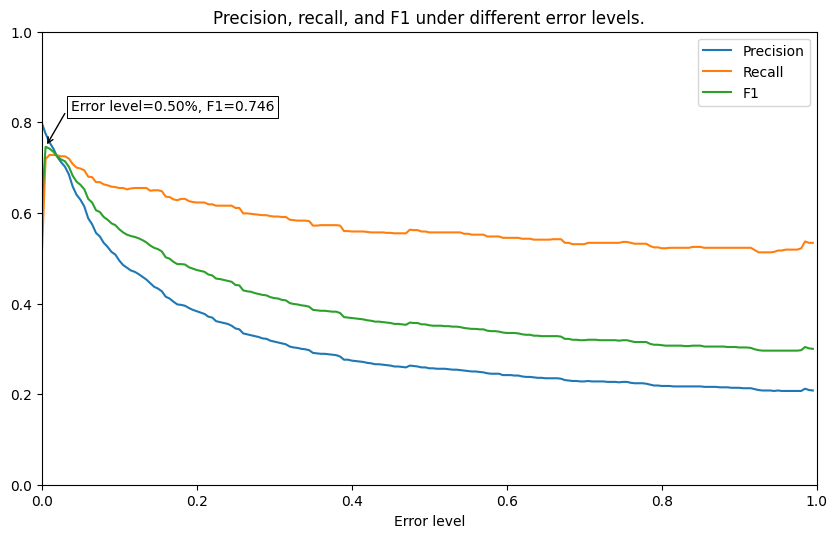

In [1241]:
used_error_level = list(prf_nextend['used_error_level'])
precisions_nextend = list(prf_nextend['precision'])
recalls_nextend = list(prf_nextend['recall'])
f1_nextend = list(prf_nextend['f1'])

plt.plot(used_error_level, precisions_nextend, label='Precision')
plt.plot(used_error_level, recalls_nextend, label='Recall')
plt.plot(used_error_level, f1_nextend, label='F1')

annot_max(used_error_level, f1_nextend)

plt.xlabel('Error level')
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('Precision, recall, and F1 under different error levels.')
plt.legend()
plt.show()

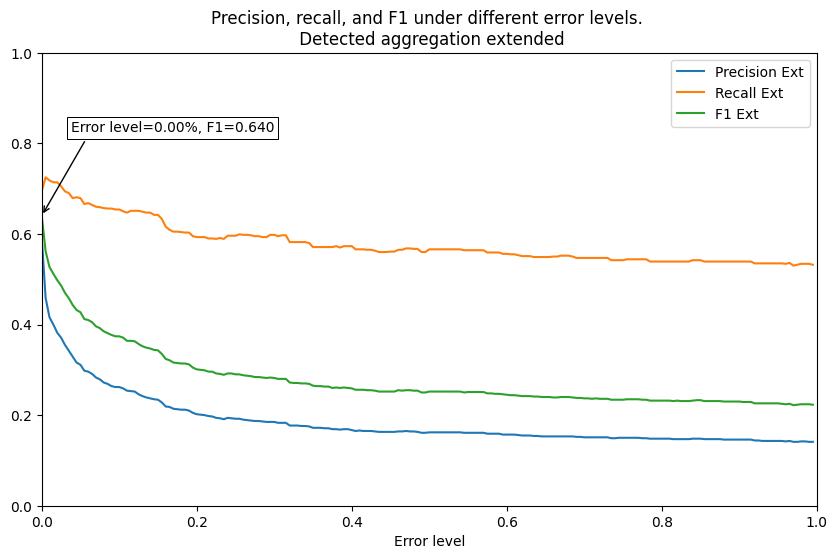

In [1195]:
precisions_extend = list(prf_extend['precision'])
recalls_extend = list(prf_extend['recall'])
f1_extend = list(prf_extend['f1'])

plt.plot(used_error_level, precisions_extend, label='Precision Ext', color='tab:blue')
plt.plot(used_error_level, recalls_extend, label='Recall Ext', color='tab:orange')
plt.plot(used_error_level, f1_extend, label='F1 Ext', color='tab:green')

annot_max(used_error_level, f1_extend)

plt.xlabel('Error level')
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('Precision, recall, and F1 under different error levels. \n Detected aggregation extended')
plt.legend()
plt.show()

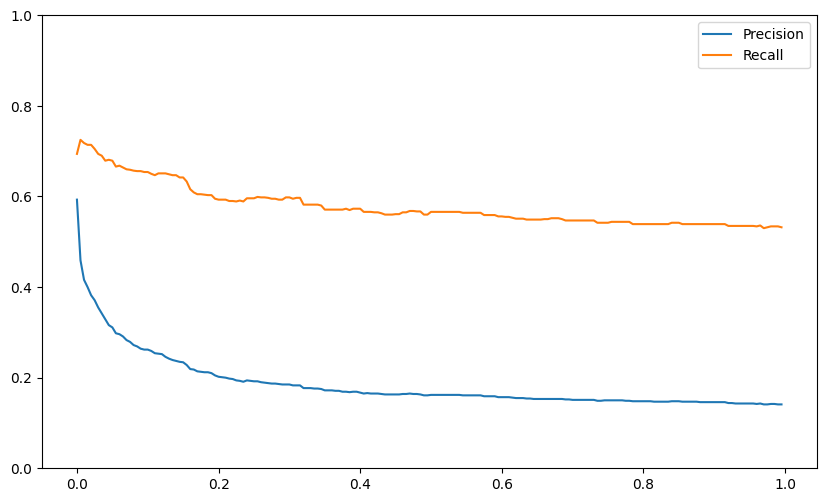

In [1193]:
used_error_level = prf_extend['used_error_level']
precisions_nextend = prf_extend['precision']
recalls_nextend = prf_extend['recall']

plt.plot(used_error_level, precisions_nextend, label='Precision')
plt.plot(used_error_level, recalls_nextend, label='Recall')
plt.ylim(0,1)
plt.legend()
plt.show()

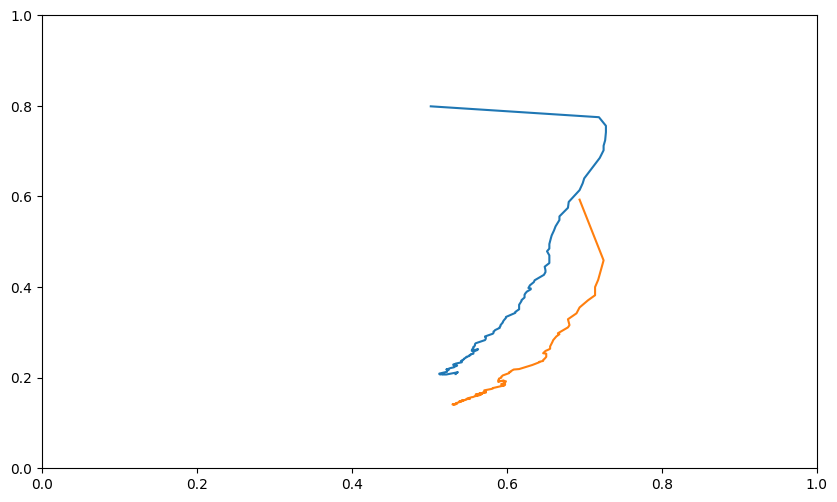

In [1196]:
precisions_nextend = prf_nextend['precision']
recalls_nextend = prf_nextend['recall']

precisions_extend = prf_extend['precision']
recalls_extend = prf_extend['recall']

plt.plot(recalls_nextend, precisions_nextend)
plt.plot(recalls_extend, precisions_extend)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()



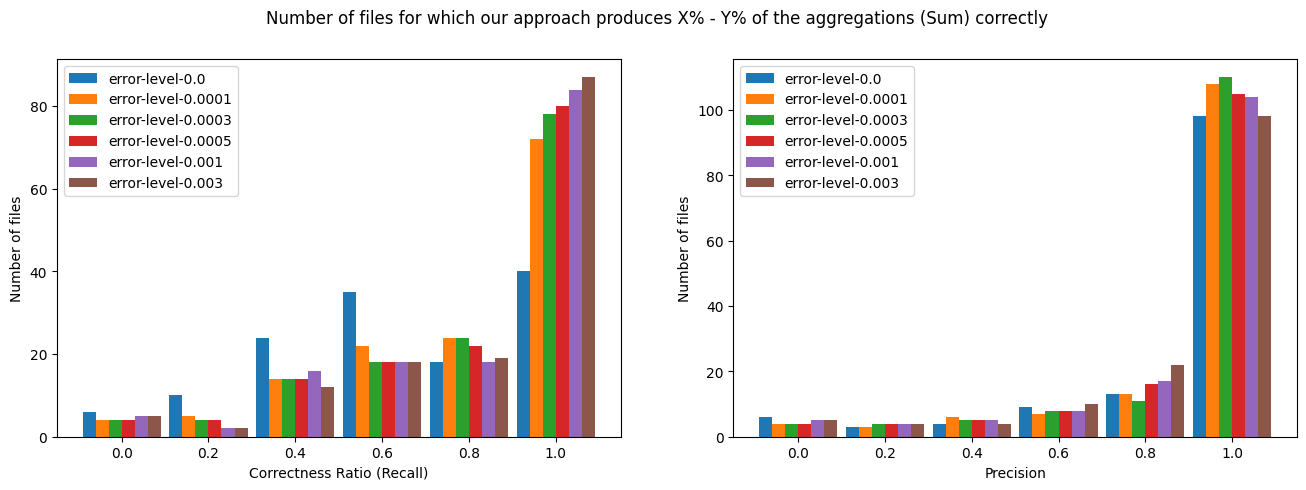

In [1261]:
labels = ["%.1f" % round(i, 2) for i in intervals]
# print(labels)

x = np.arange(len(labels))
width = 0.15

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 5])

p11 = ax1.bar(x-2.5*width, file_percent_dist_correctness[6][1], width, label=file_percent_dist_correctness[6][0])
p12 = ax1.bar(x-1.5*width, file_percent_dist_correctness[1][1], width, label=file_percent_dist_correctness[1][0])
p13 = ax1.bar(x-0.5*width, file_percent_dist_correctness[4][1], width, label=file_percent_dist_correctness[4][0])
p14 = ax1.bar(x+0.5*width, file_percent_dist_correctness[0][1], width, label=file_percent_dist_correctness[0][0])
p15 = ax1.bar(x+1.5*width, file_percent_dist_correctness[3][1], width, label=file_percent_dist_correctness[3][0])
p16 = ax1.bar(x+2.5*width, file_percent_dist_correctness[5][1], width, label=file_percent_dist_correctness[5][0])
# p17 = ax1.bar(x-2.5*width, file_percent_dist_correctness[2][1], width, label=file_percent_dist_correctness[2][0])
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Correctness Ratio (Recall)')
ax1.set_ylabel('Number of files')
ax1.legend(loc='upper left')

p21 = ax2.bar(x-2.5*width, file_percent_dist_precision[6][1], width, label=file_percent_dist_precision[6][0])
p22 = ax2.bar(x-1.5*width, file_percent_dist_precision[1][1], width, label=file_percent_dist_precision[1][0])
p23 = ax2.bar(x-0.5*width, file_percent_dist_precision[4][1], width, label=file_percent_dist_precision[4][0])
p24 = ax2.bar(x+0.5*width, file_percent_dist_precision[0][1], width, label=file_percent_dist_precision[0][0])
p25 = ax2.bar(x+1.5*width, file_percent_dist_precision[3][1], width, label=file_percent_dist_precision[3][0])
p26 = ax2.bar(x+2.5*width, file_percent_dist_precision[5][1], width, label=file_percent_dist_precision[5][0])
# p27 = ax2.bar(x+2.5*width, file_percent_dist_precision[2][1], width, label=file_percent_dist_precision[2][0])
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_xlabel('Precision')
ax2.set_ylabel('Number of files')
ax2.legend(loc='upper left')

# Set a title of the current axes.
fig.suptitle('Number of files for which our approach produces X% - Y% of the aggregations (Sum) correctly')

plt.show()

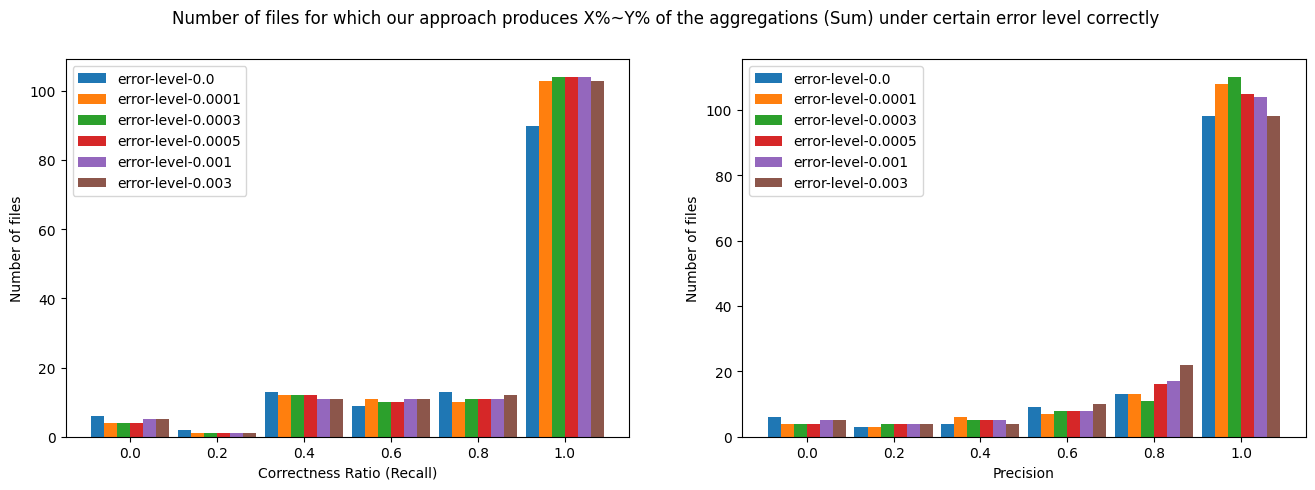

In [1257]:
labels = ["%.1f" % round(i, 2) for i in intervals]
# print(labels)

x = np.arange(len(labels))
width = 0.15

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 5])

p11 = ax1.bar(x-2.5*width, file_percent_dist_correctness_error_bounded[6][1], width, label=file_percent_dist_correctness_error_bounded[6][0])
p12 = ax1.bar(x-1.5*width, file_percent_dist_correctness_error_bounded[1][1], width, label=file_percent_dist_correctness_error_bounded[1][0])
p13 = ax1.bar(x-0.5*width, file_percent_dist_correctness_error_bounded[4][1], width, label=file_percent_dist_correctness_error_bounded[4][0])
p14 = ax1.bar(x+0.5*width, file_percent_dist_correctness_error_bounded[0][1], width, label=file_percent_dist_correctness_error_bounded[0][0])
p15 = ax1.bar(x+1.5*width, file_percent_dist_correctness_error_bounded[3][1], width, label=file_percent_dist_correctness_error_bounded[3][0])
p16 = ax1.bar(x+2.5*width, file_percent_dist_correctness_error_bounded[5][1], width, label=file_percent_dist_correctness_error_bounded[5][0])
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Correctness Ratio (Recall)')
ax1.set_ylabel('Number of files')
ax1.legend(loc='upper left')

p21 = ax2.bar(x-2.5*width, file_percent_dist_precision_error_bounded[6][1], width, label=file_percent_dist_precision_error_bounded[6][0])
p22 = ax2.bar(x-1.5*width, file_percent_dist_precision_error_bounded[1][1], width, label=file_percent_dist_precision_error_bounded[1][0])
p23 = ax2.bar(x-0.5*width, file_percent_dist_precision_error_bounded[4][1], width, label=file_percent_dist_precision_error_bounded[4][0])
p24 = ax2.bar(x+0.5*width, file_percent_dist_precision_error_bounded[0][1], width, label=file_percent_dist_precision_error_bounded[0][0])
p25 = ax2.bar(x+1.5*width, file_percent_dist_precision_error_bounded[3][1], width, label=file_percent_dist_precision_error_bounded[3][0])
p26 = ax2.bar(x+2.5*width, file_percent_dist_precision_error_bounded[5][1], width, label=file_percent_dist_precision_error_bounded[5][0])
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_xlabel('Precision')
ax2.set_ylabel('Number of files')
ax2.legend(loc='upper left')

# Set a title of the current axes.
fig.suptitle('Number of files for which our approach produces X%~Y% of the aggregations (Sum) under certain error level correctly')


plt.show()

In [1262]:
file_percent_dist_correctness = [[e[0].replace('error-level-', ''), e[1]] for e in file_percent_dist_correctness]
file_percent_dist_correctness = [e for e in sorted(file_percent_dist_correctness, key=lambda x: float(x[0]))]
print(*file_percent_dist_correctness, sep='\n')
print()

file_percent_dist_precision = [[e[0].replace('error-level-', ''), e[1]] for e in file_percent_dist_precision]
file_percent_dist_precision = [e for e in sorted(file_percent_dist_precision, key=lambda x: float(x[0]))]
print(*file_percent_dist_precision, sep='\n')
print()

file_percent_dist_correctness_error_bounded = [[e[0].replace('error-level-', ''), e[1]] for e in file_percent_dist_correctness_error_bounded]
file_percent_dist_correctness_error_bounded = [e for e in sorted(file_percent_dist_correctness_error_bounded, key=lambda x: float(x[0]))]
print(*file_percent_dist_correctness_error_bounded, sep='\n')
print()

file_percent_dist_precision_error_bounded = [[e[0].replace('error-level-', ''), e[1]] for e in file_percent_dist_precision_error_bounded]
file_percent_dist_precision_error_bounded = [e for e in sorted(file_percent_dist_precision_error_bounded, key=lambda x: float(x[0]))]
print(*file_percent_dist_precision_error_bounded, sep='\n')

['0.0', [6, 10, 24, 35, 18, 40]]
['0.0001', [4, 5, 14, 22, 24, 72]]
['0.0003', [4, 4, 14, 18, 24, 78]]
['0.0005', [4, 4, 14, 18, 22, 80]]
['0.001', [5, 2, 16, 18, 18, 84]]
['0.003', [5, 2, 12, 18, 19, 87]]
['0.005', [5, 2, 12, 14, 17, 93]]

['0.0', [6, 3, 4, 9, 13, 98]]
['0.0001', [4, 3, 6, 7, 13, 108]]
['0.0003', [4, 4, 5, 8, 11, 110]]
['0.0005', [4, 4, 5, 8, 16, 105]]
['0.001', [5, 4, 5, 8, 17, 104]]
['0.003', [5, 4, 4, 10, 22, 98]]
['0.005', [5, 4, 5, 8, 24, 97]]

['0.0', [6, 2, 13, 9, 13, 90]]
['0.0001', [4, 1, 12, 11, 10, 103]]
['0.0003', [4, 1, 12, 10, 11, 104]]
['0.0005', [4, 1, 12, 10, 11, 104]]
['0.001', [5, 1, 11, 11, 11, 104]]
['0.003', [5, 1, 11, 11, 12, 103]]
['0.005', [5, 1, 11, 11, 11, 104]]

['0.0', [6, 3, 4, 9, 13, 98]]
['0.0001', [4, 3, 6, 7, 13, 108]]
['0.0003', [4, 4, 5, 8, 11, 110]]
['0.0005', [4, 4, 5, 8, 16, 105]]
['0.001', [5, 4, 5, 8, 17, 104]]
['0.003', [5, 4, 4, 10, 22, 98]]
['0.005', [5, 4, 5, 8, 24, 97]]


['0.0', '0.0001', '0.0003', '0.0005', '0.001', '0.003', '0.005']


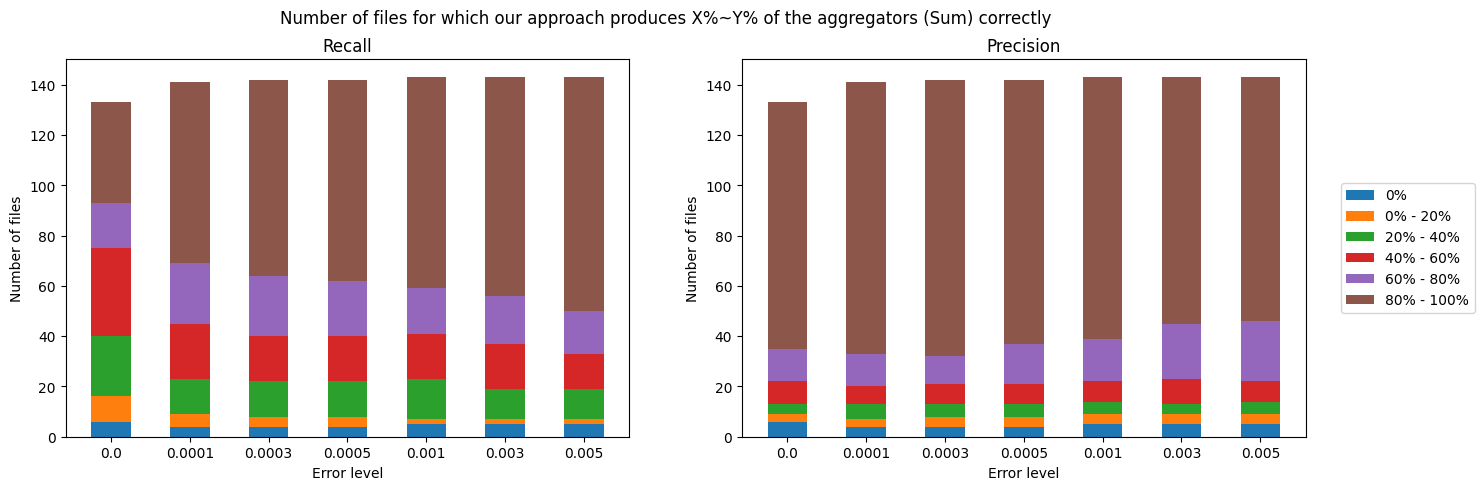

In [1263]:
labels = [i[0] for i in file_percent_dist_correctness]
print(labels)

x = np.arange(len(labels))
width = 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 5])

le_0_dist = [dist[1][0] for dist in file_percent_dist_correctness]
le_20_dist = [dist[1][1] for dist in file_percent_dist_correctness]
le_40_dist = [dist[1][2] for dist in file_percent_dist_correctness]
le_60_dist = [dist[1][3] for dist in file_percent_dist_correctness]
le_80_dist = [dist[1][4] for dist in file_percent_dist_correctness]
le_100_dist = [dist[1][5] for dist in file_percent_dist_correctness]

p11 = ax1.bar(x, le_0_dist, width)
p12 = ax1.bar(x, le_20_dist, width, bottom=le_0_dist)
p13 = ax1.bar(x, le_40_dist, width, bottom=[i+j for i, j in zip(le_0_dist, le_20_dist)])
p14 = ax1.bar(x, le_60_dist, width, bottom=[i+j+k for i,j,k in zip(le_0_dist, le_20_dist, le_40_dist)])
p15 = ax1.bar(x, le_80_dist, width, bottom=[i+j+k+m for i,j,k,m in zip(le_0_dist, le_20_dist, le_40_dist, le_60_dist)])
p16 = ax1.bar(x, le_100_dist, width, bottom=[i+j+k+m+n for i,j,k,m,n in zip(le_0_dist, le_20_dist, le_40_dist, le_60_dist, le_80_dist)])
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Error level')
ax1.set_ylabel('Number of files')
# ax1.legend((p11[0], p12[0], p13[0], p14[0], p15[0], p16[0]), ('0%', '0% - 20%', '20% - 40%', '40% - 60%', '60% - 80%', '80% - 100%'), 
#            loc='center left', bbox_to_anchor=(1.05, 0.5))
ax1.title.set_text('Recall')

le_0_dist_precision = [dist[1][0] for dist in file_percent_dist_precision]
le_20_dist_precision = [dist[1][1] for dist in file_percent_dist_precision]
le_40_dist_precision = [dist[1][2] for dist in file_percent_dist_precision]
le_60_dist_precision = [dist[1][3] for dist in file_percent_dist_precision]
le_80_dist_precision = [dist[1][4] for dist in file_percent_dist_precision]
le_100_dist_precision = [dist[1][5] for dist in file_percent_dist_precision]

p21 = ax2.bar(x, le_0_dist_precision, width)
p22 = ax2.bar(x, le_20_dist_precision, width, bottom=le_0_dist_precision)
p23 = ax2.bar(x, le_40_dist_precision, width, bottom=[i+j for i, j in zip(le_0_dist_precision, le_20_dist_precision)])
p24 = ax2.bar(x, le_60_dist_precision, width, bottom=[i+j+k for i,j,k in zip(le_0_dist_precision, le_20_dist_precision, le_40_dist_precision)])
p25 = ax2.bar(x, le_80_dist_precision, width, bottom=[i+j+k+m for i,j,k,m in zip(le_0_dist_precision, le_20_dist_precision, le_40_dist_precision, le_60_dist_precision)])
p26 = ax2.bar(x, le_100_dist_precision, width, bottom=[i+j+k+m+n for i,j,k,m,n in zip(le_0_dist_precision, le_20_dist_precision, le_40_dist_precision, 
                                                                           le_60_dist_precision, le_80_dist_precision)])
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_xlabel('Error level')
ax2.set_ylabel('Number of files')
ax2.legend((p21[0], p22[0], p23[0], p24[0], p25[0], p26[0]), ('0%', '0% - 20%', '20% - 40%', '40% - 60%', '60% - 80%', '80% - 100%'), 
           loc='center left', bbox_to_anchor=(1.05, 0.5))
ax2.title.set_text('Precision')

# Set a title of the current axes.
fig.suptitle('Number of files for which our approach produces X%~Y% of the aggregators (Sum) correctly')

plt.show()

['0.0', '0.0001', '0.0003', '0.0005', '0.001', '0.003', '0.005']


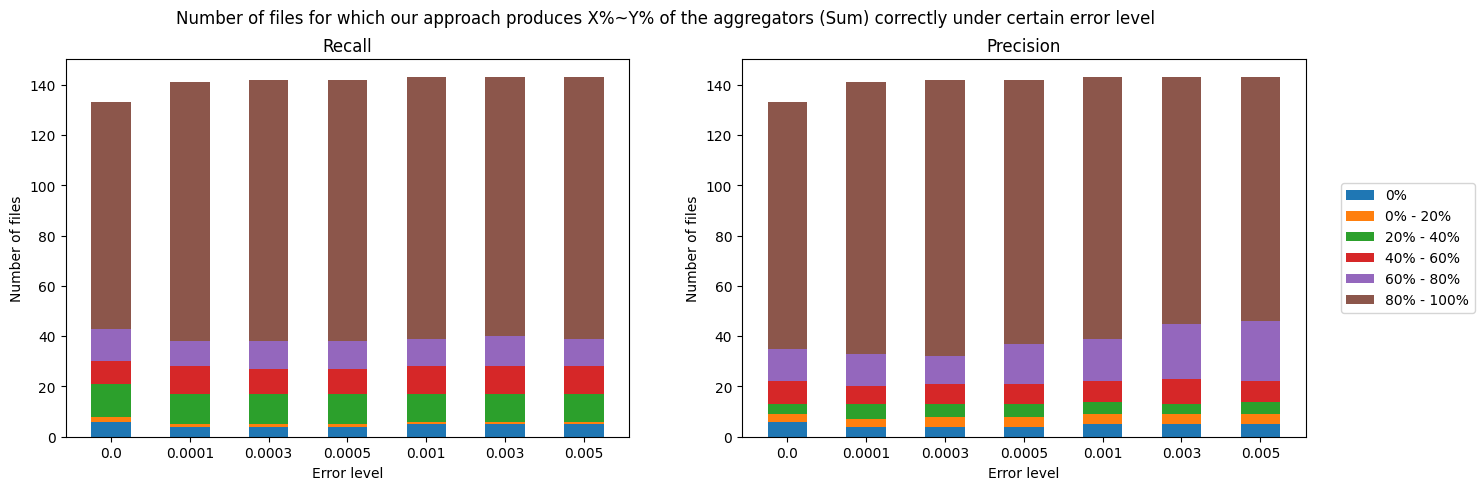

In [1265]:
labels = [i[0] for i in file_percent_dist_correctness]
print(labels)

x = np.arange(len(labels))
width = 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 5])

le_0_dist = [dist[1][0] for dist in file_percent_dist_correctness_error_bounded]
le_20_dist = [dist[1][1] for dist in file_percent_dist_correctness_error_bounded]
le_40_dist = [dist[1][2] for dist in file_percent_dist_correctness_error_bounded]
le_60_dist = [dist[1][3] for dist in file_percent_dist_correctness_error_bounded]
le_80_dist = [dist[1][4] for dist in file_percent_dist_correctness_error_bounded]
le_100_dist = [dist[1][5] for dist in file_percent_dist_correctness_error_bounded]

p11 = ax1.bar(x, le_0_dist, width)
p12 = ax1.bar(x, le_20_dist, width, bottom=le_0_dist)
p13 = ax1.bar(x, le_40_dist, width, bottom=[i+j for i, j in zip(le_0_dist, le_20_dist)])
p14 = ax1.bar(x, le_60_dist, width, bottom=[i+j+k for i,j,k in zip(le_0_dist, le_20_dist, le_40_dist)])
p15 = ax1.bar(x, le_80_dist, width, bottom=[i+j+k+m for i,j,k,m in zip(le_0_dist, le_20_dist, le_40_dist, le_60_dist)])
p16 = ax1.bar(x, le_100_dist, width, bottom=[i+j+k+m+n for i,j,k,m,n in zip(le_0_dist, le_20_dist, le_40_dist, le_60_dist, le_80_dist)])
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Error level')
ax1.set_ylabel('Number of files')
# ax1.legend((p11[0], p12[0], p13[0], p14[0], p15[0], p16[0]), ('0%', '0% - 20%', '20% - 40%', '40% - 60%', '60% - 80%', '80% - 100%'), 
#            loc='center left', bbox_to_anchor=(1.05, 0.5))
ax1.title.set_text('Recall')

le_0_dist_precision = [dist[1][0] for dist in file_percent_dist_precision_error_bounded]
le_20_dist_precision = [dist[1][1] for dist in file_percent_dist_precision_error_bounded]
le_40_dist_precision = [dist[1][2] for dist in file_percent_dist_precision_error_bounded]
le_60_dist_precision = [dist[1][3] for dist in file_percent_dist_precision_error_bounded]
le_80_dist_precision = [dist[1][4] for dist in file_percent_dist_precision_error_bounded]
le_100_dist_precision = [dist[1][5] for dist in file_percent_dist_precision_error_bounded]

p21 = ax2.bar(x, le_0_dist_precision, width)
p22 = ax2.bar(x, le_20_dist_precision, width, bottom=le_0_dist_precision)
p23 = ax2.bar(x, le_40_dist_precision, width, bottom=[i+j for i, j in zip(le_0_dist_precision, le_20_dist_precision)])
p24 = ax2.bar(x, le_60_dist_precision, width, bottom=[i+j+k for i,j,k in zip(le_0_dist_precision, le_20_dist_precision, le_40_dist_precision)])
p25 = ax2.bar(x, le_80_dist_precision, width, bottom=[i+j+k+m for i,j,k,m in zip(le_0_dist_precision, le_20_dist_precision, le_40_dist_precision, le_60_dist_precision)])
p26 = ax2.bar(x, le_100_dist_precision, width, bottom=[i+j+k+m+n for i,j,k,m,n in zip(le_0_dist_precision, le_20_dist_precision, le_40_dist_precision, 
                                                                           le_60_dist_precision, le_80_dist_precision)])
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_xlabel('Error level')
ax2.set_ylabel('Number of files')
ax2.legend((p21[0], p22[0], p23[0], p24[0], p25[0], p26[0]), ('0%', '0% - 20%', '20% - 40%', '40% - 60%', '60% - 80%', '80% - 100%'), 
           loc='center left', bbox_to_anchor=(1.05, 0.5))
ax2.title.set_text('Precision')

# Set a title of the current axes.
fig.suptitle('Number of files for which our approach produces X%~Y% of the aggregators (Sum) correctly under certain error level')

plt.show()

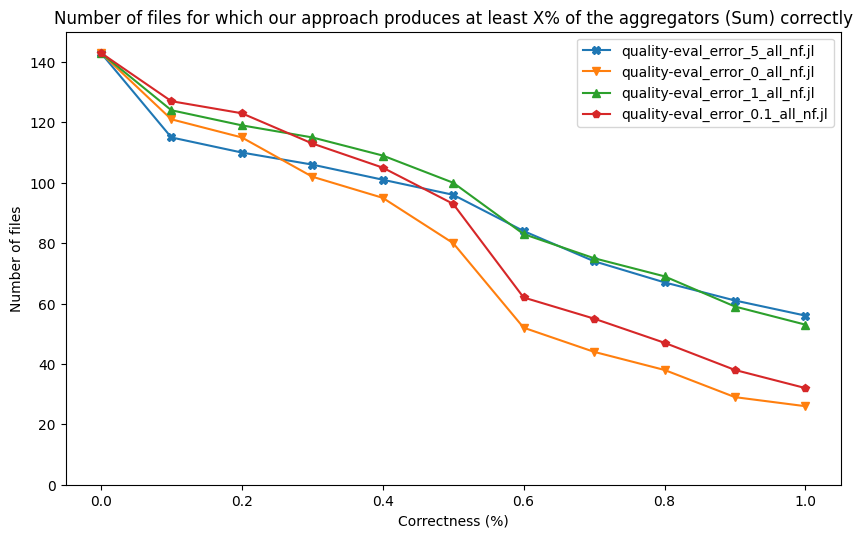

In [166]:
# plt.plot(intervals, [t[1] for t in y[0][1]], marker='*', label = y[0][0])
# plt.plot(intervals, [t[1] for t in y[1][1]], marker='+', label = y[1][0])
plt.plot(intervals, [t[1] for t in y[2][1]], marker='X', label = y[2][0])
# plt.plot(intervals, [t[1] for t in y[3][1]], marker='o', label = y[3][0])
plt.plot(intervals, [t[1] for t in y[4][1]], marker='v', label = y[4][0])
# plt.plot(intervals, [t[1] for t in y[5][1]], marker='d', label = y[5][0])
plt.plot(intervals, [t[1] for t in y[6][1]], marker='^', label = y[6][0])
plt.plot(intervals, [t[1] for t in y[7][1]], marker='p', label = y[7][0])

plt.xlabel('Correctness (%)')
# Set the y axis label of the current axis.
plt.ylabel('Number of files')
# Set a title of the current axes.
plt.title('Number of files for which our approach produces at least X% of the aggregators (Sum) correctly')

axes = plt.gca()
axes.set_ylim([0,150])

plt.legend()
plt.show()

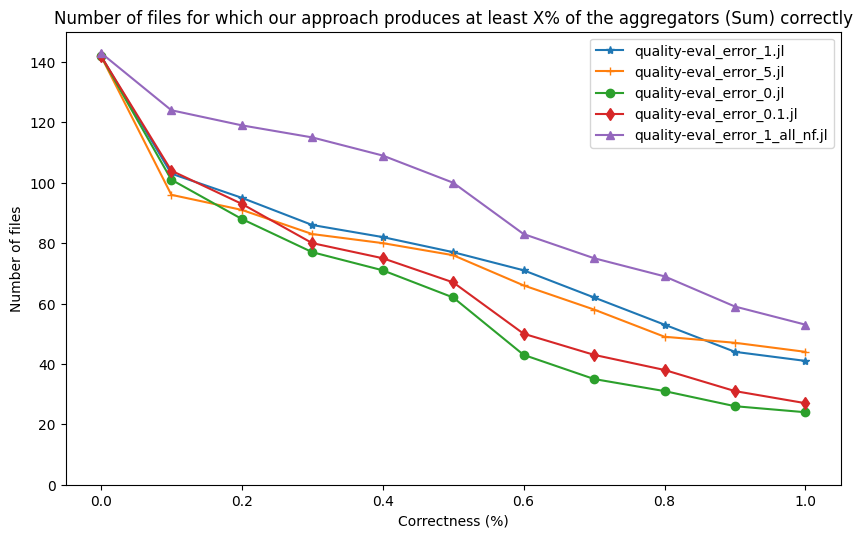

In [169]:
plt.plot(intervals, [t[1] for t in y[0][1]], marker='*', label = y[0][0])
plt.plot(intervals, [t[1] for t in y[1][1]], marker='+', label = y[1][0])
# plt.plot(intervals, [t[1] for t in y[2][1]], marker='X', label = y[2][0])
plt.plot(intervals, [t[1] for t in y[3][1]], marker='o', label = y[3][0])
# plt.plot(intervals, [t[1] for t in y[4][1]], marker='v', label = y[4][0])
plt.plot(intervals, [t[1] for t in y[5][1]], marker='d', label = y[5][0])
plt.plot(intervals, [t[1] for t in y[6][1]], marker='^', label = y[6][0])
# plt.plot(intervals, [t[1] for t in y[7][1]], marker='p', label = y[7][0])

plt.xlabel('Correctness (%)')
# Set the y axis label of the current axis.
plt.ylabel('Number of files')
# Set a title of the current axes.
plt.title('Number of files for which our approach produces at least X% of the aggregators (Sum) correctly')

axes = plt.gca()
axes.set_ylim([0,150])

plt.legend()
plt.show()

In [47]:
os.chdir('../../notebooks/')

In [104]:
file_path = '/Users/lan/Documents/hpi/projects/aggregation-detection/code/aggregation-detection/aggrdet/results/quality-eval_error_1_full_nf.jl'

import pandas

l_val = []

with open(file_path, 'r') as file_reader:
    dicts = [json.loads(line) for line in file_reader]
    for d in dicts:
#         print(d['file_name'])
        values = np.array(d['table_array'])
        file_size = values.shape[0] * values.shape[1]
        gts = d['aggregation_annotations']
        sum_subtract_count = 0
        if gts is None:
            continue
        for gt in gts:
            if gt['operator'] == 'Sum' or gt['operator'] == 'Subtract':
                sum_subtract_count += 1
        if sum_subtract_count == 0:
            continue
        num_correct = len(d['correct'])
        num_incorrect = len(d['incorrect'])
        correct_percent = num_correct / (num_correct + num_incorrect)
        l_val.append([sum_subtract_count, num_correct, num_incorrect, correct_percent, file_size])

In [120]:
df = pandas.DataFrame(l_val, columns=['Number of aggregators', 'Number of correct', 'Number of incorrect', 'Correct percentage', 'File size'])
df = df.sort_values(by=['Correct percentage', 'Number of aggregators']).reset_index(drop=True)

In [121]:
df.to_csv('/Users/lan/Documents/hpi/projects/aggregation-detection/experiments/tableau/troy_sum_correct_analysis.csv', index=True)